In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import losses, optimizers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#運用pd讀取資料
milk = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv", index_col = 'Month')
milk.tail()

,Monthly milk production (pounds per cow)
Month,
1975-08,858
1975-09,817
1975-10,827
1975-11,797
1975-12,843


In [3]:
#運用pd Datetime讀取資料
milk.index = pd.to_datetime(milk.index)
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [4]:
print(milk.index)
milk.index = pd.to_datetime(milk.index)
print(milk.index)

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)
DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)


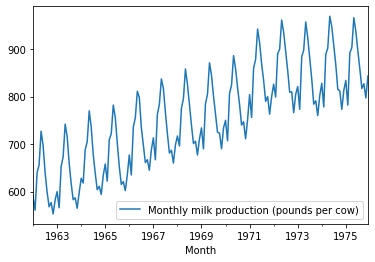

In [5]:
#讀取資料(圖表)
milk.plot()

In [6]:
#創建dataset
train_set = milk.head((1976-1962-1) * 12)
test_set = milk.tail(12)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)
test_scaled = scaler.transform(test_set)

len(train_scaled)

156

In [7]:
def build_train_data(data, past_monthes = 12, future_monthes = 1):
  X_train, Y_train = [], []

  for i in range(data.shape[0] + 1 - past_monthes - future_monthes):
    X_train.append(np.array(data[i : i + past_monthes]))
    Y_train.append(np.array(data[i + past_monthes : i + past_monthes + future_monthes]))
  
  return np.array(X_train).reshape([-1, 12]), np.array(Y_train).reshape([-1, 1])


x, y = build_train_data(train_scaled)
print('x shape:', x.shape, 'y shape:', y.shape)

x shape: (144, 12) y shape: (144, 1)


In [9]:
#構建網路模型
model = tf.keras.Sequential([          
      tf.keras.layers.Reshape((12, 1), batch_size = 1),
      tf.keras.layers.SimpleRNN(40, return_sequences = True),
      tf.keras.layers.Dense(1),
      tf.keras.layers.Reshape((12, 1), batch_size = 1),
      tf.keras.layers.LSTM(40, return_sequences = True, activation='tanh', kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal'),
      tf.keras.layers.SimpleRNN(40, return_sequences = True),
      tf.keras.layers.Dense(1)
])

"""

# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(d2v_model.wv.vocab)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

"""

'\n\n# init layer\nmodel = Sequential()\n\n# emmbed word vectors\nmodel.add(Embedding(len(d2v_model.wv.vocab)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))\n\n# learn the correlations\ndef split_input(sequence):\n     return sequence[:-1], tf.reshape(sequence[1:], (-1,1))\nmodel.add(LSTM(50,return_sequences=False))\nmodel.add(Dense(3,activation="softmax"))\n\n# output model skeleton\nmodel.summary()\nmodel.compile(optimizer="adam",loss="binary_crossentropy",metrics=[\'acc\'])\n\n'

In [10]:
#compile模型
model.compile(optimizer = optimizers.Adam(0.001), loss = losses.MeanSquaredError())

In [11]:
#訓練模型
model.fit(x, y, epochs = 60, batch_size = 1)

Epoch 1/60
144/144 [==============================] - 35s 11ms/step - loss: 0.1333
Epoch 2/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0358
Epoch 3/60
144/144 [==============================] - 2s 11ms/step - loss: 0.0322
Epoch 4/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0231
Epoch 5/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0211
Epoch 6/60
144/144 [==============================] - 2s 11ms/step - loss: 0.0177
Epoch 7/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0139
Epoch 8/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0144
Epoch 9/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0085
Epoch 10/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0091
Epoch 11/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0085
Epoch 12/60
144/144 [==============================] - 2s 12ms/step - loss: 0.0072
Epoch 13/60


In [ ]:
train_seed = list(train_scaled[-12:].flatten())
print(np.array(train_seed[-12:]).reshape(1, 12).astype(np.float64))
print(train_seed)

[[0.66105769 0.54086538 0.80769231 0.83894231 1.         0.94711538
  0.85336538 0.75480769 0.62980769 0.62259615 0.52884615 0.625     ]]
[0.6610576923076923, 0.5408653846153846, 0.8076923076923077, 0.8389423076923077, 1.0000000000000002, 0.9471153846153848, 0.8533653846153848, 0.7548076923076923, 0.6298076923076923, 0.622596153846154, 0.528846153846154, 0.625]


In [ ]:
train_seed = list(train_scaled[-12:].flatten())
print(np.array(train_seed[-12:]).reshape(1, 12).astype(np.float64))
print(train_seed)

[[0.66105769 0.54086538 0.80769231 0.83894231 1.         0.94711538
  0.85336538 0.75480769 0.62980769 0.62259615 0.52884615 0.625     ]]
[0.6610576923076923, 0.5408653846153846, 0.8076923076923077, 0.8389423076923077, 1.0000000000000002, 0.9471153846153848, 0.8533653846153848, 0.7548076923076923, 0.6298076923076923, 0.622596153846154, 0.528846153846154, 0.625]


In [ ]:
x_train = np.array(train_seed[-12:]).reshape(1, 12).astype(np.float64)
print(model.predict(x_train)[0][0])

[0.68950933 0.6821903  0.6681078  0.668973   0.69492716 0.69047225
 0.6665754  0.68684006 0.6843796  0.686132   0.6912578  0.6912889
 0.69068474 0.6935892  0.7022494  0.68648493 0.68829125 0.6759372
 0.6872498  0.65726465]


In [ ]:
x_train = np.array(train_seed[-12:]).reshape(1, 12).astype(np.float64)
print(model.predict(x_train)[0][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [12]:
#預測模型
from keras import models

train_seed = list(train_scaled[-12:].flatten())

def get_prediction(data_list):
    predict = []
    train_seed = data_list
    for i in range(12):
        x_train = np.array(train_seed[-12:]).reshape(1, 12).astype(np.float64)
        #x_train = np.array(train_seed[-12:]).reshape(1, 12)
        one_predict = model.predict(x_train)[0][0]
        predict.append(one_predict)
        train_seed.append(one_predict)

    return predict, train_seed

predict, train_seed = get_prediction(train_seed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [13]:
results = scaler.inverse_transform(np.array(predict).reshape(12, 1))
test_set['Generated'] = results
test_set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Monthly milk production (pounds per cow),Generated
Month,,
1975-01-01,834,828.769714
1975-02-01,782,783.071960
1975-03-01,892,884.509216
1975-04-01,903,896.297119
1975-05-01,966,956.019714
1975-06-01,937,936.636475
1975-07-01,896,901.720276
1975-08-01,858,864.465759
1975-09-01,817,816.861938


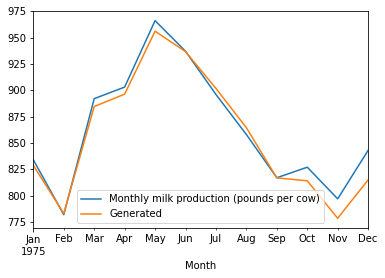

In [14]:
test_set.plot()

In [15]:
true = milk.tail(12).to_numpy()
def mape(true, results):
    return np.mean(np.abs((results - true) / true)) * 100

print(mape(true, results))

1.0017389571158402
